# Penulisan Ilmiah
## Datadiri :
>
> Nama : Muhammad Faqih Hakim
>
> NPM : 51422032

In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.3 MB/s eta 0:00:00


In [ ]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.6 MB/s eta 0:00:00


In [ ]:
import yaml
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
import random
import itertools
from ultralytics import YOLO
from roboflow import Roboflow
import pandas as pd
from google.colab import files
from datetime import datetime

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
rf = Roboflow(api_key="jFj6dO8DDczUZ9kJ1xuo")
project = rf.workspace("kkkk-6bpnc").project("kk-8ucwu")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to kk-2 in yolov8:: 100%|██████████| 14612/14612 [00:04<00:00, 3577.49it/s]


In [ ]:
train_images_path = "/content/kk-2/train/images"
train_labels_path = "/content/kk-2/train/labels"

In [ ]:
image_files = [f for f in os.listdir(train_images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
sample_files = random.sample(image_files, min(12, len(image_files)))

In [ ]:
def draw_bounding_boxes(img, label_path):
    h, w = img.shape[:2]
    with open("/content/kk-2/data.yaml", 'r') as f:
        data = yaml.safe_load(f)
    class_names = data['names']

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            if line.strip():
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:5])
                x_center *= w
                y_center *= h
                width *= w
                height *= h

                x1 = int(x_center - width / 2)
                y1 = int(y_center - height / 2)
                x2 = int(x_center + width / 2)
                y2 = int(y_center + height / 2)

                color = (0, 255, 0)
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                class_name = class_names[class_id] if class_id < len(class_names) else f"Class_{class_id}"
                text_size, _ = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                text_y = y1 - 5 if y1 - 5 > text_size[1] else y2 + text_size[1] + 5
                cv2.putText(img, class_name, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    return img

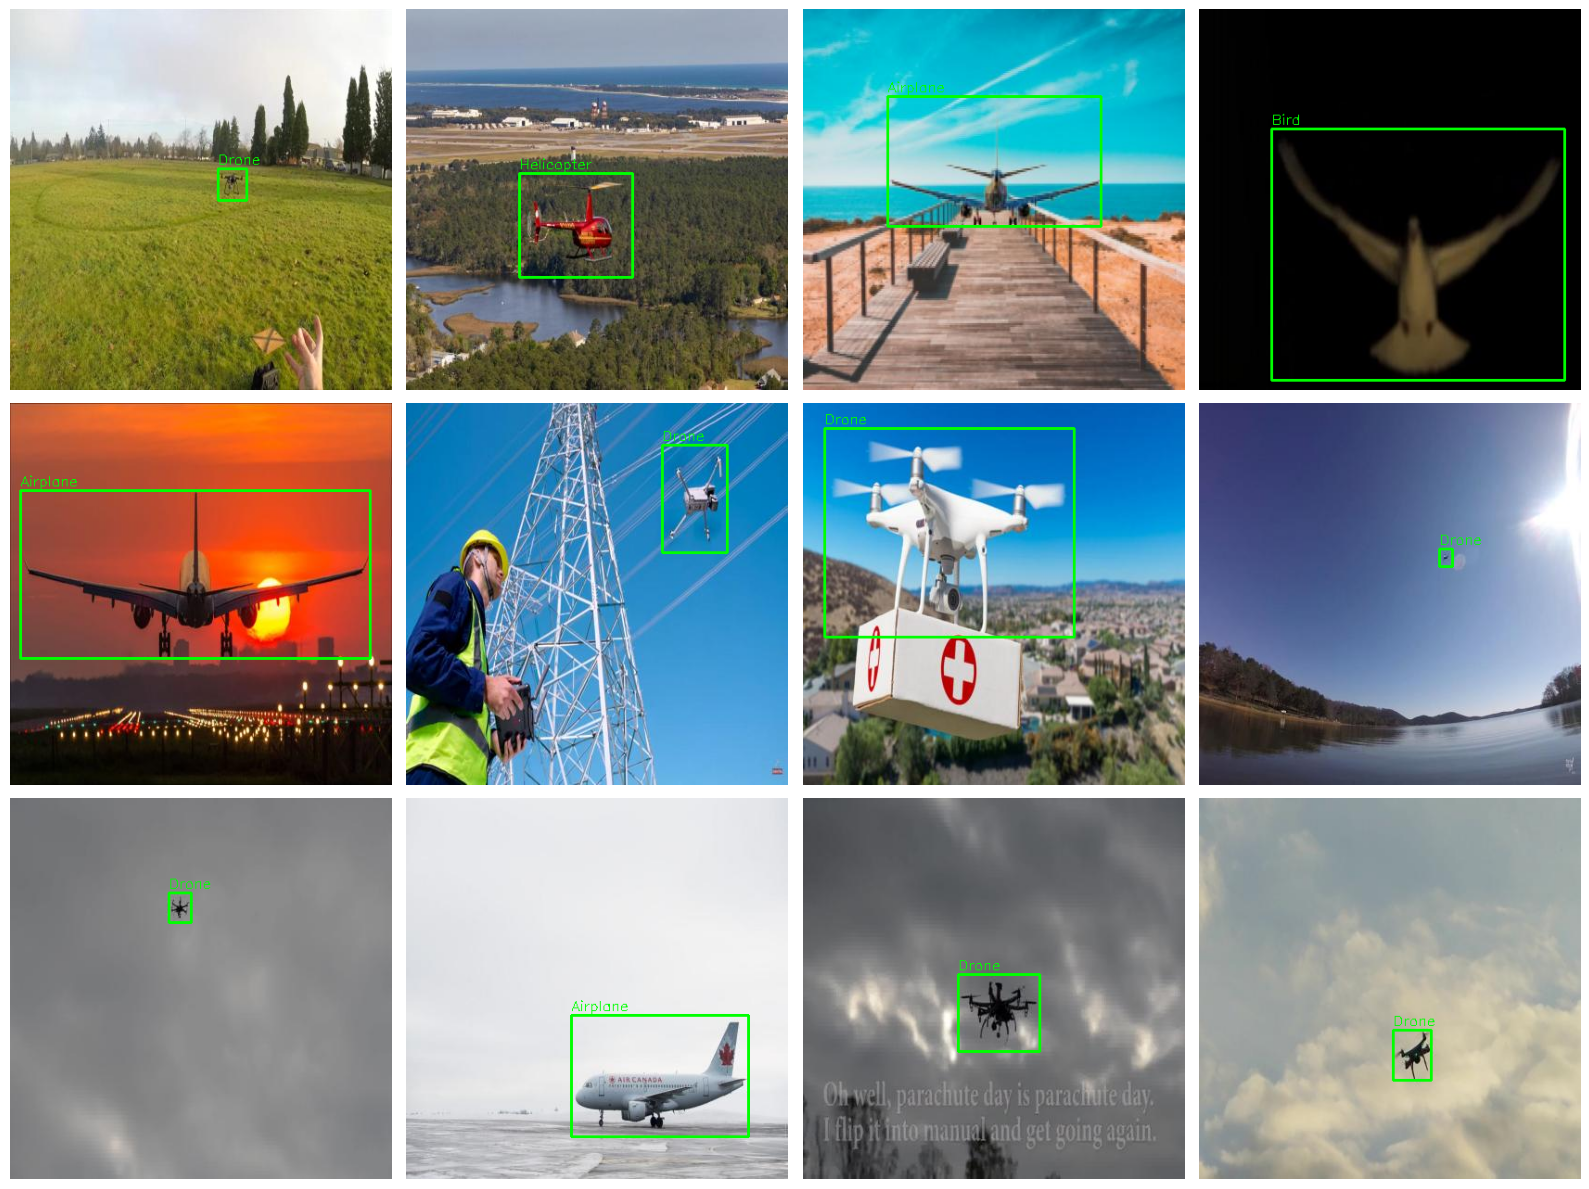

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, img_file in enumerate(sample_files):
    img_path = os.path.join(train_images_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    label_path = os.path.join(train_labels_path, label_file)

    img = draw_bounding_boxes(img, label_path)

    axes[i].imshow(img)
    axes[i].axis('off')

for i in range(len(sample_files), 12):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
learning_rates = [0.0005, 0.001]
batch_sizes = [8]
weight_decays = [0.0005, 0.001]
optimizers = ['Adam']

In [ ]:
combos = list(itertools.product(learning_rates, batch_sizes, weight_decays, optimizers))
print(f"Total kombinasi: {len(combos)}")
for i, (lr, batch, wd, opt) in enumerate(combos):
    print(f"Kombinasi {i+1}: LR={lr}, Batch={batch}, WD={wd}, Optimizer={opt}")

Total kombinasi: 4
Kombinasi 1: LR=0.0005, Batch=8, WD=0.0005, Optimizer=Adam
Kombinasi 2: LR=0.0005, Batch=8, WD=0.001, Optimizer=Adam
Kombinasi 3: LR=0.001, Batch=8, WD=0.0005, Optimizer=Adam
Kombinasi 4: LR=0.001, Batch=8, WD=0.001, Optimizer=Adam


In [ ]:
for i, (lr, batch, weight_decay, optimizer) in enumerate(combos):
    print("=" * 60)
    print(f"Training Model {i+1}/{len(combos)}")
    print(f"Start Time   : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Parameters  : lr={lr}, batch={batch}, weight_decay={weight_decay}, optimizer={optimizer}")
    print(f"Dir Save Name   : run_{i+1}_lr{lr}_b{batch}_wd{weight_decay}_{optimizer}")
    print("=" * 60)

    model = YOLO("yolov8n.pt")

    model.train(
        data="/content/kk-2/data.yaml",
        epochs=15,
        imgsz=640,
        batch=batch,
        lr0=lr,
        optimizer=optimizer,
        weight_decay=weight_decay,

        # Regularization
        warmup_epochs=3,
        dropout=0.1,
        patience=10,

        # Augmentation
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        degrees=10.0,
        translate=0.1,
        scale=0.5,
        shear=2.0,
        fliplr=0.5,
        mosaic=1.0,
        mixup=0.1,
        copy_paste=0.1,

        # Output
        name=f"run_{i+1}_lr{lr}_b{batch}_wd{weight_decay}_{optimizer}",
        plots=False,
        save=True,
        save_period=10,
        verbose=False,
        device=0
    )


Training Model 1/4
Start Time   : 2025-05-25 11:52:37
Parameters  : lr=0.0005, batch=8, weight_decay=0.0005, optimizer=Adam
Dir Save Name   : run_1_lr0.0005_b8_wd0.0005_Adam


100%|██████████| 6.25M/6.25M [00:00<00:00, 122MB/s]


Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run_1_lr0.0005_b8_wd0.0005_Adam, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=10, perspective=0.0, plots=False, p

100%|██████████| 755k/755k [00:00<00:00, 35.2MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 147MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 708.0±423.0 MB/s, size: 15.4 KB)


train: Scanning /content/kk-2/train/labels... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:02<00:00, 2367.34it/s]


train: New cache created: /content/kk-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 319.3±121.7 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<00:00, 1099.36it/s]

val: New cache created: /content/kk-2/valid/labels.cache


optimizer: Adam(lr=0.0005, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/run_1_lr0.0005_b8_wd0.0005_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.11G      1.477      2.128      1.548         11        640: 100%|██████████| 721/721 [02:11<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.75it/s]


                   all        778        843      0.658      0.616      0.662      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.36G      1.378      1.624      1.492         23        640: 100%|██████████| 721/721 [02:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.68it/s]

                   all        778        843      0.744      0.661      0.784      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.38G      1.348      1.494      1.456         19        640: 100%|██████████| 721/721 [02:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.68it/s]

                   all        778        843      0.827      0.735      0.837      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.39G      1.304      1.377      1.437         11        640: 100%|██████████| 721/721 [02:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.70it/s]

                   all        778        843      0.915      0.798      0.902      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.41G      1.287      1.306      1.425         13        640: 100%|██████████| 721/721 [02:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.68it/s]

                   all        778        843      0.878      0.836      0.917      0.506


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.43G      1.114     0.8822      1.319          7        640: 100%|██████████| 721/721 [01:51<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.64it/s]

                   all        778        843      0.884      0.885      0.926      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.45G      1.083     0.7846      1.295          7        640: 100%|██████████| 721/721 [01:52<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.80it/s]

                   all        778        843      0.927      0.871      0.943      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.46G      1.064     0.7284      1.275          8        640: 100%|██████████| 721/721 [01:50<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.81it/s]

                   all        778        843      0.929       0.92      0.962      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.48G      1.044     0.6709      1.257          8        640: 100%|██████████| 721/721 [01:50<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.89it/s]

                   all        778        843      0.935      0.884      0.956      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15       1.5G       1.02     0.6451      1.241          7        640: 100%|██████████| 721/721 [01:50<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.68it/s]

                   all        778        843      0.961      0.902      0.966      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.51G      1.002     0.6127      1.224          7        640: 100%|██████████| 721/721 [01:51<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.71it/s]

                   all        778        843      0.954      0.916       0.97      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.53G     0.9822     0.5796      1.217          7        640: 100%|██████████| 721/721 [01:49<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.72it/s]

                   all        778        843      0.963      0.936      0.968       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.55G     0.9594     0.5602      1.192          8        640: 100%|██████████| 721/721 [01:49<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.76it/s]

                   all        778        843      0.957      0.931      0.967      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.56G     0.9412     0.5288      1.188          8        640: 100%|██████████| 721/721 [01:50<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.73it/s]

                   all        778        843      0.962      0.923      0.974      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.58G     0.9248     0.5107      1.169          7        640: 100%|██████████| 721/721 [01:49<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.76it/s]

                   all        778        843      0.962      0.937       0.97      0.728



15 epochs completed in 0.509 hours.
Optimizer stripped from runs/detect/run_1_lr0.0005_b8_wd0.0005_Adam/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/run_1_lr0.0005_b8_wd0.0005_Adam/weights/best.pt, 6.2MB

Validating runs/detect/run_1_lr0.0005_b8_wd0.0005_Adam/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  8.85it/s]

                   all        778        843      0.961      0.937       0.97      0.727
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 1.7ms postprocess per image


Training Model 2/4
Start Time   : 2025-05-25 12:23:36
Parameters  : lr=0.0005, batch=8, weight_decay=0.001, optimizer=Adam
Dir Save Name   : run_2_lr0.0005_b8_wd0.001_Adam
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale

train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 299.3±198.3 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.0005, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/run_2_lr0.0005_b8_wd0.001_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.29G      1.476      2.122      1.545         11        640: 100%|██████████| 721/721 [02:08<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.14it/s]

                   all        778        843       0.69      0.657      0.729      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.53G      1.373      1.596      1.473         23        640: 100%|██████████| 721/721 [02:03<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.78it/s]

                   all        778        843      0.872      0.596      0.804      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.53G      1.347      1.483      1.451         19        640: 100%|██████████| 721/721 [02:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.92it/s]

                   all        778        843      0.782      0.752      0.843      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.53G      1.308      1.386      1.438         11        640: 100%|██████████| 721/721 [02:02<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.09it/s]

                   all        778        843      0.889      0.807      0.884      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.53G      1.281      1.305       1.42         13        640: 100%|██████████| 721/721 [02:08<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.70it/s]

                   all        778        843      0.895      0.828      0.915      0.532


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.53G      1.117     0.8758      1.321          7        640: 100%|██████████| 721/721 [02:06<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.99it/s]

                   all        778        843      0.914      0.846      0.938      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.53G      1.078     0.7723      1.292          7        640: 100%|██████████| 721/721 [01:53<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.13it/s]

                   all        778        843      0.917      0.904      0.952      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.53G      1.053     0.7277      1.269          8        640: 100%|██████████| 721/721 [01:52<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  8.17it/s]

                   all        778        843      0.938      0.911      0.963      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.53G       1.04     0.6803      1.256          8        640: 100%|██████████| 721/721 [01:53<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  8.24it/s]

                   all        778        843      0.969      0.876      0.958      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.53G      1.019     0.6428       1.24          7        640: 100%|██████████| 721/721 [02:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.11it/s]

                   all        778        843      0.967      0.927      0.972      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.53G          1      0.618      1.222          7        640: 100%|██████████| 721/721 [01:58<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.73it/s]

                   all        778        843      0.968      0.922      0.974      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.53G     0.9778     0.5825      1.217          7        640: 100%|██████████| 721/721 [01:57<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.54it/s]


                   all        778        843      0.967      0.931      0.973       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.53G     0.9632     0.5584      1.198          8        640: 100%|██████████| 721/721 [01:57<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.07it/s]

                   all        778        843      0.959      0.945      0.973      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.53G     0.9427     0.5328      1.187          8        640: 100%|██████████| 721/721 [01:56<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.06it/s]

                   all        778        843      0.965      0.934      0.977      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.53G     0.9177     0.5121      1.167          7        640: 100%|██████████| 721/721 [01:54<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.01it/s]

                   all        778        843      0.979      0.934      0.977      0.738



15 epochs completed in 0.528 hours.
Optimizer stripped from runs/detect/run_2_lr0.0005_b8_wd0.001_Adam/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/run_2_lr0.0005_b8_wd0.001_Adam/weights/best.pt, 6.2MB

Validating runs/detect/run_2_lr0.0005_b8_wd0.001_Adam/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  9.50it/s]

                   all        778        843      0.965      0.934      0.977      0.741
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.3ms postprocess per image


Training Model 3/4
Start Time   : 2025-05-25 12:55:26
Parameters  : lr=0.001, batch=8, weight_decay=0.0005, optimizer=Adam
Dir Save Name   : run_3_lr0.001_b8_wd0.0005_Adam
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=

train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 265.6±106.8 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/run_3_lr0.001_b8_wd0.0005_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.19G      1.506      2.146      1.589         11        640: 100%|██████████| 721/721 [02:19<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.73it/s]


                   all        778        843      0.584      0.597      0.604      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.42G      1.438      1.727      1.547         23        640: 100%|██████████| 721/721 [02:12<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.97it/s]

                   all        778        843      0.755      0.654      0.748      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.42G      1.418      1.624      1.534         19        640: 100%|██████████| 721/721 [02:09<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.76it/s]

                   all        778        843      0.738      0.725      0.779      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.42G      1.372      1.524      1.508         11        640: 100%|██████████| 721/721 [02:08<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.91it/s]

                   all        778        843      0.865      0.744      0.865      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.42G       1.34      1.423      1.485         13        640: 100%|██████████| 721/721 [02:07<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.56it/s]

                   all        778        843      0.878      0.753      0.866      0.514


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.42G      1.175     0.9587      1.394          7        640: 100%|██████████| 721/721 [01:57<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.84it/s]

                   all        778        843      0.898      0.834      0.918      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.42G      1.125     0.8407      1.352          7        640: 100%|██████████| 721/721 [01:56<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.72it/s]

                   all        778        843      0.939      0.844      0.938      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.42G      1.101     0.8052      1.325          8        640: 100%|██████████| 721/721 [01:56<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.21it/s]

                   all        778        843      0.966      0.845      0.936      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.42G      1.086     0.7464       1.31          8        640: 100%|██████████| 721/721 [01:54<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.78it/s]

                   all        778        843      0.942       0.85      0.939      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.42G      1.056     0.6957      1.294          7        640: 100%|██████████| 721/721 [01:55<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.02it/s]

                   all        778        843      0.924      0.894      0.944      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.42G      1.042     0.6638      1.278          7        640: 100%|██████████| 721/721 [01:54<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.84it/s]

                   all        778        843      0.946      0.912      0.969      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.42G      1.014     0.6199      1.258          7        640: 100%|██████████| 721/721 [01:55<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.96it/s]

                   all        778        843      0.944      0.897       0.96      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.42G      1.002     0.5981      1.241          8        640: 100%|██████████| 721/721 [01:56<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.94it/s]

                   all        778        843      0.952      0.901       0.96      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.42G     0.9707      0.563      1.228          8        640: 100%|██████████| 721/721 [01:55<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.94it/s]

                   all        778        843      0.939      0.952      0.974      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.42G     0.9472     0.5344      1.204          7        640: 100%|██████████| 721/721 [01:54<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  8.21it/s]

                   all        778        843      0.953      0.937      0.968      0.718



15 epochs completed in 0.534 hours.
Optimizer stripped from runs/detect/run_3_lr0.001_b8_wd0.0005_Adam/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/run_3_lr0.001_b8_wd0.0005_Adam/weights/best.pt, 6.2MB

Validating runs/detect/run_3_lr0.001_b8_wd0.0005_Adam/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.90it/s]

                   all        778        843      0.953      0.937      0.968      0.717
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 1.9ms postprocess per image


Training Model 4/4
Start Time   : 2025-05-25 13:27:36
Parameters  : lr=0.001, batch=8, weight_decay=0.001, optimizer=Adam
Dir Save Name   : run_4_lr0.001_b8_wd0.001_Adam
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=Fa

train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 215.5±82.4 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/run_4_lr0.001_b8_wd0.001_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.13G       1.51      2.155      1.587         11        640: 100%|██████████| 721/721 [02:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.98it/s]

                   all        778        843      0.546       0.58       0.56      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.38G      1.447      1.752      1.554         23        640: 100%|██████████| 721/721 [02:06<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.53it/s]


                   all        778        843      0.642      0.611      0.674      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.39G      1.422      1.637      1.531         19        640: 100%|██████████| 721/721 [02:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.88it/s]


                   all        778        843      0.747      0.643      0.728      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.39G      1.381      1.554      1.517         11        640: 100%|██████████| 721/721 [02:06<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.94it/s]

                   all        778        843      0.813      0.744      0.852      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.39G      1.342      1.446       1.49         13        640: 100%|██████████| 721/721 [02:07<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.00it/s]

                   all        778        843       0.87      0.729      0.858       0.49


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.39G      1.171     0.9889      1.391          7        640: 100%|██████████| 721/721 [01:57<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.93it/s]

                   all        778        843      0.895      0.829      0.909       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.39G      1.124     0.8668      1.349          7        640: 100%|██████████| 721/721 [01:57<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.02it/s]

                   all        778        843      0.898       0.83      0.911      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.39G      1.105     0.8111      1.327          8        640: 100%|██████████| 721/721 [01:56<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.83it/s]

                   all        778        843      0.919      0.853      0.931      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.39G      1.088      0.758      1.316          8        640: 100%|██████████| 721/721 [01:57<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.84it/s]

                   all        778        843      0.939      0.864      0.946      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.39G      1.059     0.7095        1.3          7        640: 100%|██████████| 721/721 [01:57<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.73it/s]

                   all        778        843      0.937      0.877      0.957      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.39G      1.046     0.6764      1.285          7        640: 100%|██████████| 721/721 [01:57<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.98it/s]

                   all        778        843      0.935      0.896      0.963      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.39G       1.01     0.6286      1.265          7        640: 100%|██████████| 721/721 [01:56<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.80it/s]

                   all        778        843      0.956      0.895      0.956      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.39G     0.9963     0.6102      1.248          8        640: 100%|██████████| 721/721 [01:56<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.96it/s]

                   all        778        843      0.942      0.916      0.962      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.39G     0.9651     0.5772      1.228          8        640: 100%|██████████| 721/721 [01:58<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.91it/s]

                   all        778        843      0.931       0.94      0.968      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.39G     0.9473     0.5452       1.21          7        640: 100%|██████████| 721/721 [01:57<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.02it/s]

                   all        778        843      0.939      0.949      0.965      0.717



15 epochs completed in 0.532 hours.
Optimizer stripped from runs/detect/run_4_lr0.001_b8_wd0.001_Adam/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/run_4_lr0.001_b8_wd0.001_Adam/weights/best.pt, 6.2MB

Validating runs/detect/run_4_lr0.001_b8_wd0.001_Adam/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.63it/s]

                   all        778        843      0.939      0.948      0.965      0.717
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.0ms postprocess per image


In [ ]:
base_dir = "/content/runs/detect"
results_summary = []

for run_dir in sorted(os.listdir(base_dir)):
    run_path = os.path.join(base_dir, run_dir)
    results_csv = os.path.join(run_path, "results.csv")

    if os.path.isfile(results_csv):
        df = pd.read_csv(results_csv)

        best_epoch = df["metrics/mAP50-95(B)"].idxmax()
        best_row = df.loc[best_epoch]

        results_summary.append({
            "run_name": run_dir,
            "epoch": int(best_row["epoch"]),
            "mAP_0.5": best_row["metrics/mAP50(B)"],
            "mAP_0.5:0.95": best_row["metrics/mAP50-95(B)"],
            "precision": best_row["metrics/precision(B)"],
            "recall": best_row["metrics/recall(B)"]
        })
    else:
        print(f"di {run_dir} (tidak ada results.csv)")

summary_df = pd.DataFrame(results_summary)
summary_df = summary_df.sort_values(by="mAP_0.5:0.95", ascending=False)


print("\nRingkasan Hasil Evaluasi:")
print(summary_df.to_string(index=False))


Ringkasan Hasil Evaluasi:
                       run_name  epoch  mAP_0.5  mAP_0.5:0.95  precision  recall
 run_2_lr0.0005_b8_wd0.001_Adam     14  0.97749       0.74096    0.96479 0.93388
run_1_lr0.0005_b8_wd0.0005_Adam     15  0.96992       0.72751    0.96158 0.93695
 run_3_lr0.001_b8_wd0.0005_Adam     15  0.96781       0.71783    0.95299 0.93743
  run_4_lr0.001_b8_wd0.001_Adam     15  0.96490       0.71732    0.93933 0.94852


In [ ]:
model_fix = YOLO("/content/runs/detect/run_2_lr0.0005_b8_wd0.001_Adam/weights/best.pt")

In [ ]:
results = model_fix.val(data='/content/kk-2/data.yaml', split='test', imgsz=640)
print(f"📈 mAP@0.5       : {results.box.map50:.4f}")
print(f"📉 mAP@0.5:0.95  : {results.box.map:.4f}")
print(f"✅ Precision     : {results.box.mp:.4f}")
print(f"🎯 Recall        : {results.box.mr:.4f}")

Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 335.2±112.7 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/test/labels.cache... 755 images, 0 backgrounds, 0 corrupt: 100%|██████████| 755/755 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]


                   all        755        813      0.964      0.961      0.982       0.75
              Airplane         53         53       0.95          1      0.993      0.815
                  Bird         86         97      0.941      0.938      0.962      0.756
                 Drone        539        573      0.987      0.954      0.985      0.716
            Helicopter         78         90      0.977       0.95       0.99      0.712
Speed: 1.4ms preprocess, 4.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
📈 mAP@0.5       : 0.9825
📉 mAP@0.5:0.95  : 0.7497
✅ Precision     : 0.9640
🎯 Recall        : 0.9605


📸 Silakan upload file gambar (.jpg/.png):


Saving pngtree-three-small-drones-flying-in-the-sky-picture-image_2674991.jpg to pngtree-three-small-drones-flying-in-the-sky-picture-image_2674991 (1).jpg

image 1/1 /content/pngtree-three-small-drones-flying-in-the-sky-picture-image_2674991 (1).jpg: 384x640 5 Drones, 7.6ms
Speed: 2.6ms preprocess, 7.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


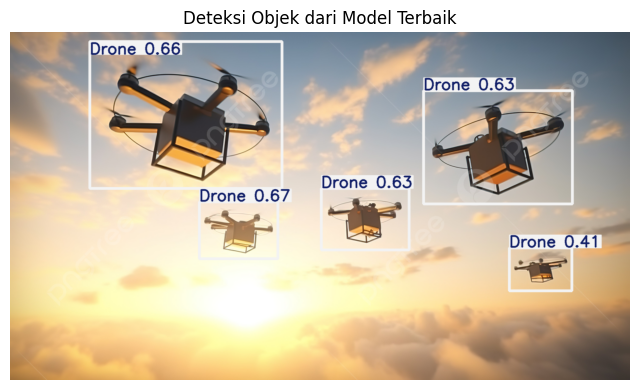

In [ ]:
from IPython.display import display

def upload_and_detect():
    print("📸 Silakan upload file gambar (.jpg/.png):")
    uploaded = files.upload()
    image_file = next((f for f in uploaded if f.endswith(('.jpg', '.png'))), None)

    if image_file:
        img = cv2.imread(image_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = model_fix.predict(image_file, imgsz=640, conf=0.25)
        result_img = results[0].plot()
        result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 8))
        plt.imshow(result_img)
        plt.axis('off')
        plt.title("Deteksi Objek dari Model Terbaik")
        plt.show()
    else:
        print("File gambar tidak ditemukan. Silakan upload file dengan ekstensi .jpg atau .png.")

upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving elang.jpg to elang.jpg

image 1/1 /content/elang.jpg: 512x640 1 Bird, 40.0ms
Speed: 4.9ms preprocess, 40.0ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 640)


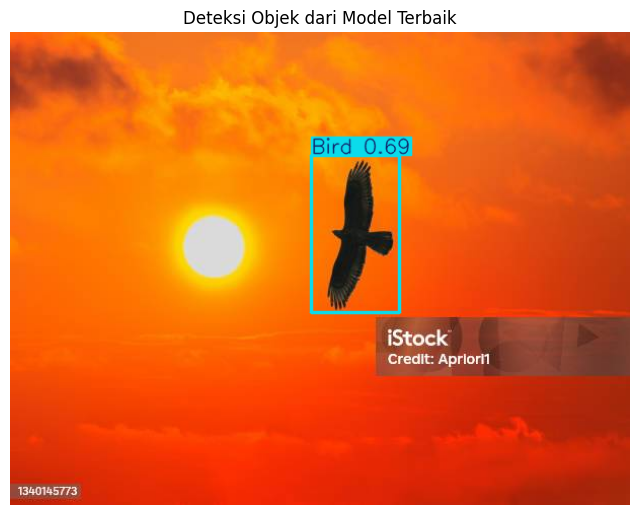

In [ ]:
upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving th (2).jpg to th (2).jpg

image 1/1 /content/th (2).jpg: 352x640 5 Helicopters, 46.0ms
Speed: 2.5ms preprocess, 46.0ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)


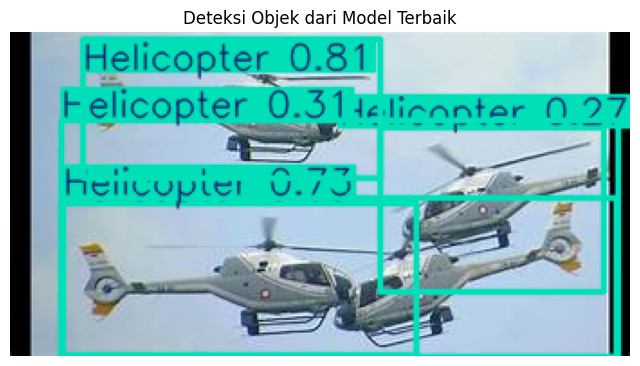

In [ ]:
upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving pngtree-airplane-in-a-sky-of-clear-blue-sky-image_13328366.jpg to pngtree-airplane-in-a-sky-of-clear-blue-sky-image_13328366.jpg

image 1/1 /content/pngtree-airplane-in-a-sky-of-clear-blue-sky-image_13328366.jpg: 448x640 1 Airplane, 11.0ms
Speed: 3.5ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


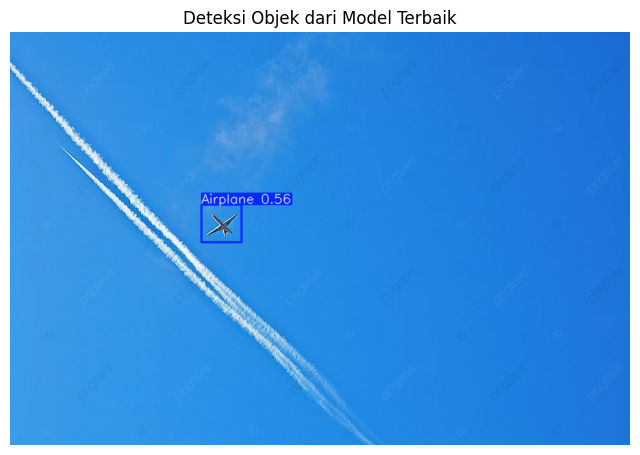

In [ ]:
upload_and_detect()